In [3]:
import torch
import numpy as np

In [2]:
torch_array = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print("Tensor array: \n\n",torch_array)

Tensor array: 

 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [4]:
numpy_array = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("\n Numpy array: \n\n",numpy_array)


 Numpy array: 

 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
np_rand = np.random.rand(3,3)
print("Random matrix with NumPy: \n")
print(np_rand,"\n")
print(np_rand.shape)

Random matrix with NumPy: 

[[0.54666442 0.04904794 0.8338621 ]
 [0.06702629 0.87335808 0.23094912]
 [0.5675891  0.78143265 0.60974314]] 

(3, 3)


In [6]:
torch_rand = torch.rand(3,3)
print("\n Random matrix with Pytorch: \n")
print(torch_rand,"\n")
print(torch_rand.shape)


 Random matrix with Pytorch: 

tensor([[0.9264, 0.2677, 0.2993],
        [0.3693, 0.3436, 0.3849],
        [0.7147, 0.4014, 0.8760]]) 

torch.Size([3, 3])


In [7]:
np_id = np.identity(3)
print(np_id,'\n')
torch_id = torch.eye(3)
print(torch_id)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### Matrix Multiplication

In [8]:
torch_a1 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
torch_a1

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [9]:
torch_a2 = torch.tensor([[2,3],[2,3],[2,3]])
torch_a2

tensor([[2, 3],
        [2, 3],
        [2, 3]])

In [10]:
torch.mm(torch_a1, torch_a2)

tensor([[12, 18],
        [30, 45],
        [48, 72]])

### torch to np

In [11]:
np_a1 = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [17]:
torch_a1 = torch.from_numpy(np_a1)

In [18]:
print(type(torch_a1))

<class 'torch.Tensor'>


In [13]:
np_a1 = torch_a1.numpy()

In [19]:
print(type(np_a1))

<class 'numpy.ndarray'>


### Autograd

In [23]:
x1 = torch.tensor([2.0], requires_grad=True).float()
z1 = x1
x2 = torch.tensor([2.0], requires_grad=True).float()
z2 = x2**2
x3 = torch.tensor([2.0], requires_grad=True).float()
z3 = x3**3

In [24]:
z1.backward()
z2.backward()
z3.backward()

In [58]:
print('dz1/dx1 evaluated in %f: %f' % (x1, x1.grad)) # dz1/dx = 2
print('dz2/dx2 evaluated in %f: %f' % (x2, x2.grad)) # dz2/dx = 2 * 2
print('dz3/dx3 evaluated in %f: %f' % (x3, x3.grad)) # dz3/dx = 3 * 4

dz1/dx1 evaluated in 2.000000: 1.000000
dz2/dx2 evaluated in 2.000000: 4.000000
dz3/dx3 evaluated in 2.000000: 12.000000


###  Single layer of a Neural Network

In [60]:
def sigm(x):
    return 1/(1+torch.exp(-x))

In [61]:
torch.manual_seed(7)
inputs = torch.randn((1,10))
w1 = torch.randn_like(inputs)
b1 = torch.randn((1,1))

In [65]:
w1.view(10,1)

tensor([[0.3177],
        [0.1328],
        [0.1373],
        [0.2405],
        [1.3955],
        [1.3470],
        [2.4382],
        [0.2028],
        [2.4505],
        [2.0256]])

In [63]:
inputs

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908, -0.8948, -0.3556,  1.2324,
          0.1382, -1.6822]])

In [68]:
output = sigm(torch.matmul(inputs, w1.T)+b1)

In [69]:
output

tensor([[0.3030]])

###  Simple Neural Network

In [70]:
input_layer = torch.rand(10)
print(input_layer.shape)

#h1 contains 20 units
w1 = torch.rand(10,20)
b1 = torch.randn(20)
#h2 contains 20 units
w2 = torch.rand(20,20)
b2 = torch.randn(20)
#the output layer has 10 units
w3 = torch.rand(20,10)
b3 = torch.randn(10)

h1 = torch.matmul(w1.T,input_layer)+b1
print("First hidden layer:")
print(h1,"\n")
h2 = torch.matmul(w2.T,h1)+b2
print("Second hidden layer:")
print(h2,"\n")
output_layer = torch.matmul(w3.T,h2)+b3
print("Output layer:")
print(output_layer)

torch.Size([10])
First hidden layer:
tensor([2.8571, 4.5964, 2.7061, 1.6105, 4.0433, 1.6860, 3.6443, 2.1050, 3.9807,
        3.4162, 2.5031, 1.6862, 2.9572, 2.2082, 3.2833, 3.7847, 2.7327, 2.6177,
        1.2653, 5.9995]) 

Second hidden layer:
tensor([32.2993, 23.9020, 20.6125, 30.9846, 30.5237, 41.0882, 27.3729, 29.6121,
        28.8898, 33.0395, 31.6494, 33.4028, 31.4145, 28.3931, 29.2206, 26.7620,
        29.9971, 33.3539, 24.0110, 28.0911]) 

Output layer:
tensor([267.5026, 292.9840, 243.6890, 277.8268, 314.4776, 387.0657, 258.0089,
        334.9822, 283.3747, 273.0109])


In [71]:
import torch.nn as nn

In [81]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # nn.Linear(i,o)
        # where i=# units in the current layer
        # o = # units in the next layer
        self.fc1 = nn.Linear(10,20)
        self.fc2 = nn.Linear(20,20)
        self.out = nn.Linear(20,10)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x


In [82]:
input_layer = torch.randn(10)
input_layer

tensor([ 0.0183,  1.2117, -0.3670, -1.0134,  0.0628, -0.6746,  0.0813, -0.5031,
        -0.6725, -1.1316])

In [83]:
net = Net()

In [84]:
net(input_layer)

tensor([ 0.0778, -0.5467,  0.3579,  0.1658, -0.2572,  0.1165,  0.0383,  0.0438,
         0.0456, -0.2261], grad_fn=<AddBackward0>)

## MNIST

In [85]:
import torchvision

In [181]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1
#torch.backends.cudnn.enables = False
torch.manual_seed(random_seed)

In [94]:
train_loader = torch.utils.data.DataLoader(
     torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
    batch_size=batch_size_train, shuffle=True,
)

In [95]:
test_loader = torch.utils.data.DataLoader(
     torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
    batch_size=batch_size_test, shuffle=True
)

In [96]:
examples = enumerate(test_loader)

In [97]:
batch_idx, (example_data, example_targets) = next(examples)

In [98]:
example_data.shape

torch.Size([1000, 1, 28, 28])

In [100]:
import matplotlib.pyplot as plt

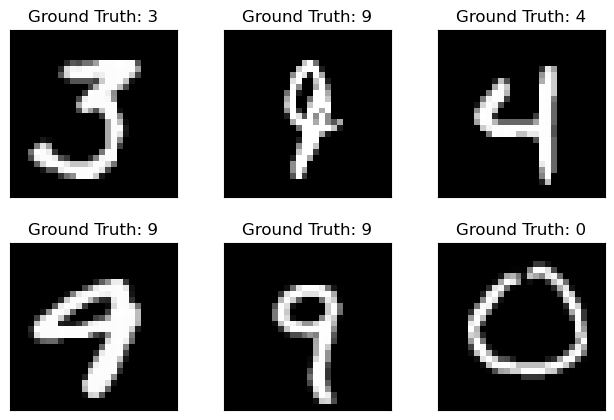

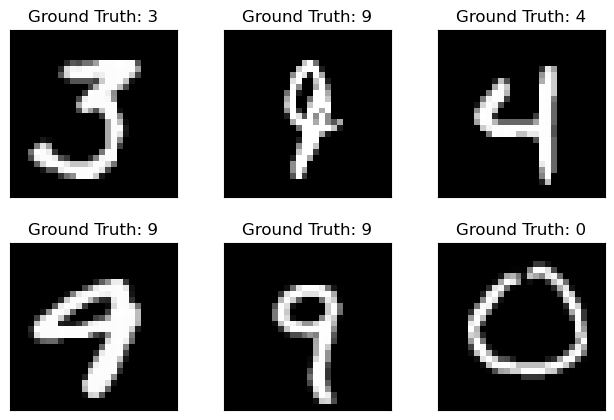

In [103]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Ground Truth: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])
fig

In [104]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [115]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320) #-1表示在不指定row的情況下調整
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [114]:
Cuda_id = torch.cuda.current_device()
print('CUDA Device ID: ', torch.cuda.current_device())
print('Name of the current CUDA Device: ', torch.cuda.get_device_name(Cuda_id))

CUDA Device ID:  0
Name of the current CUDA Device:  NVIDIA GeForce RTX 2060 SUPER


In [110]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x = torch.randint(1, 100, (100, 100)).to(torch.device(device))
x.device

device(type='cuda', index=0)

In [111]:
x.cpu().device

device(type='cpu')

In [196]:
network = Net()
network.to(torch.device(device))
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [209]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [210]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data.to(device=device))
        loss = F.nll_loss(output, target.to(device=device))
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx*len(data)}/{len(train_loader.dataset)}] ({100. * batch_idx / len(train_loader):.0f}%)\tLoss: {loss.item():.6f}')
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), './results/model.pth')
            torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [211]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad(): # context 不須計算梯度與 backward propagation
    for data, target in test_loader:
      output = network(data.to(device=device))
      test_loss += F.nll_loss(output, target.to(device=device), size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.to(device=device).data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print(f'\nTest set: Avg. loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

In [212]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

C:\Users\islab\AppData\Local\Temp\ipykernel_13524\3416364491.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0954, Accuracy: 9712/10000 (97%)

Train Epoch: 1 [0/60000] (0%)	Loss: 0.238909
Train Epoch: 1 [640/60000] (1%)	Loss: 0.263194
Train Epoch: 1 [1280/60000] (2%)	Loss: 0.270783
Train Epoch: 1 [1920/60000] (3%)	Loss: 0.243326
Train Epoch: 1 [2560/60000] (4%)	Loss: 0.277874
Train Epoch: 1 [3200/60000] (5%)	Loss: 0.287095
Train Epoch: 1 [3840/60000] (6%)	Loss: 0.240191
Train Epoch: 1 [4480/60000] (7%)	Loss: 0.322554
Train Epoch: 1 [5120/60000] (9%)	Loss: 0.566293
Train Epoch: 1 [5760/60000] (10%)	Loss: 0.319347
Train Epoch: 1 [6400/60000] (11%)	Loss: 0.218075
Train Epoch: 1 [7040/60000] (12%)	Loss: 0.317368
Train Epoch: 1 [7680/60000] (13%)	Loss: 0.118967
Train Epoch: 1 [8320/60000] (14%)	Loss: 0.221920
Train Epoch: 1 [8960/60000] (15%)	Loss: 0.230873
Train Epoch: 1 [9600/60000] (16%)	Loss: 0.219641
Train Epoch: 1 [10240/60000] (17%)	Loss: 0.366206
Train Epoch: 1 [10880/60000] (18%)	Loss: 0.238939
Train Epoch: 1 [11520/60000] (19%)	Loss: 0.137018
Train Epoch: 1 [12160

In [213]:
network.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 0.2130, -0.0388,  0.2318,  0.0310, -0.1556],
                        [ 0.1617, -0.0600,  0.1138, -0.0254, -0.0597],
                        [-0.1349, -0.1049,  0.1415,  0.0416,  0.2472],
                        [ 0.2087, -0.0108, -0.0807,  0.2586,  0.1303],
                        [-0.0879,  0.1427,  0.1439,  0.2046, -0.0992]]],
              
              
                      [[[ 0.0305,  0.0441, -0.0025, -0.2565, -0.2640],
                        [ 0.0876,  0.1060,  0.3075,  0.1532,  0.0399],
                        [-0.0768,  0.2007,  0.4020,  0.1068,  0.1608],
                        [-0.2900, -0.1699,  0.0924,  0.1063,  0.1844],
                        [-0.2376, -0.3547, -0.0908, -0.1215,  0.1206]]],
              
              
                      [[[ 0.1831, -0.0474,  0.0458, -0.1112, -0.3945],
                        [ 0.0576,  0.2281,  0.0067, -0.3163, -0.3780],
                        [ 0.2921,  0.2240,  0.1765, -0

In [214]:
network.state_dict().keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

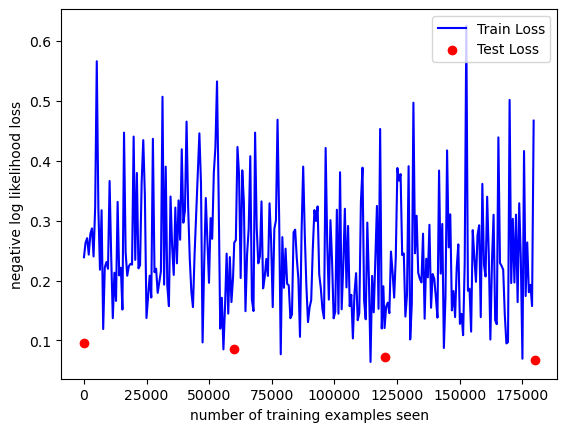

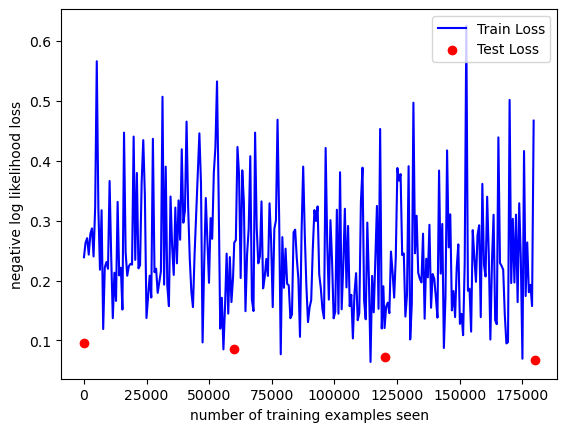

In [215]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [207]:
test_counter

[60000, 120000, 180000]

In [205]:
test_losses

[0.19808684387207032, 0.12073213806152344, 0.09542050857543945]